<a href="https://colab.research.google.com/github/Dharmasastha2005/Pancreatic-Single-Cell-Analysis/blob/Code/Pancreatic_Single_cell_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 6.8 MB/s eta 0:00:00


In [4]:
%pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 58.9 MB/s eta 0:00:00


In [6]:
%pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/scanpy/datasets/_utils.py:35: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(ad.__version__).release >= (0, 8):


Initial dataset shape: (2700, 32738)


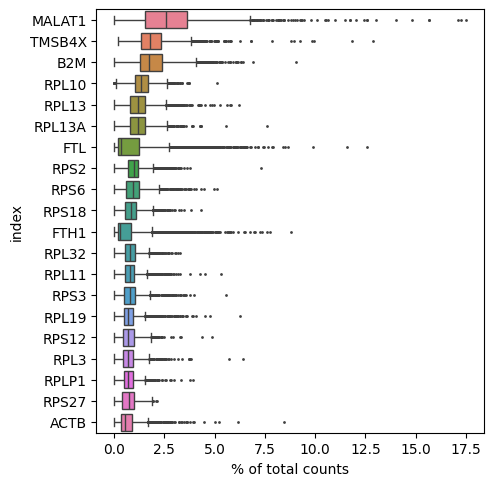

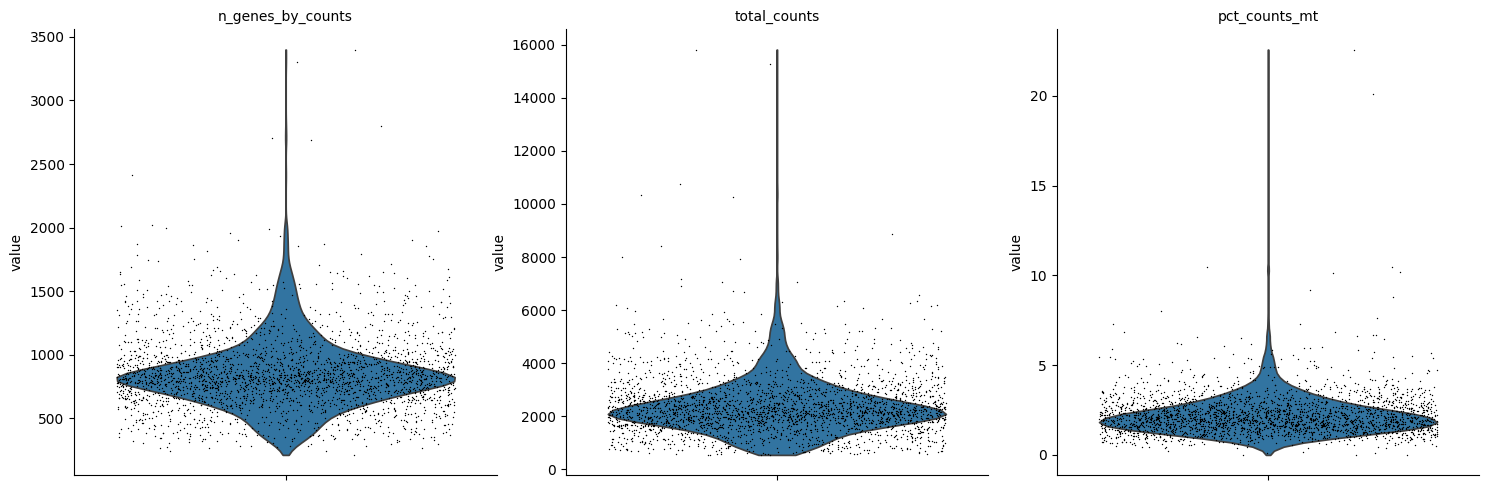

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


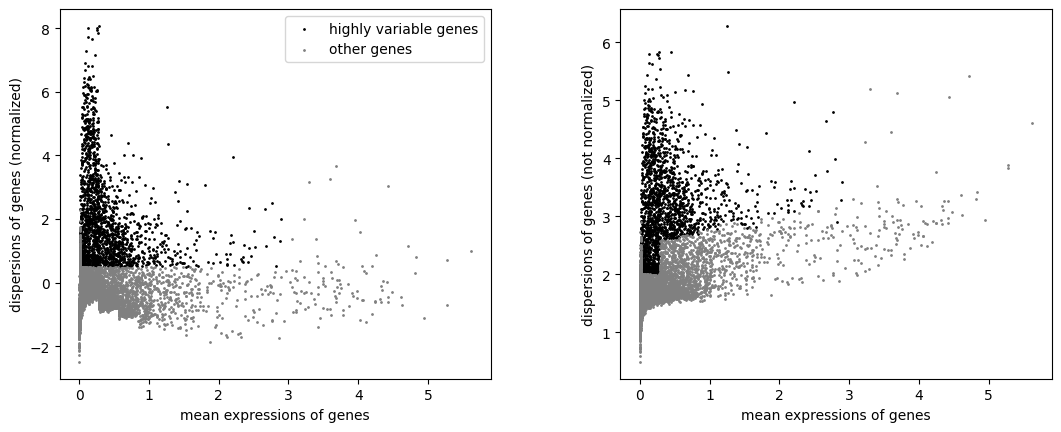

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_pca/__init__.py:245: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")


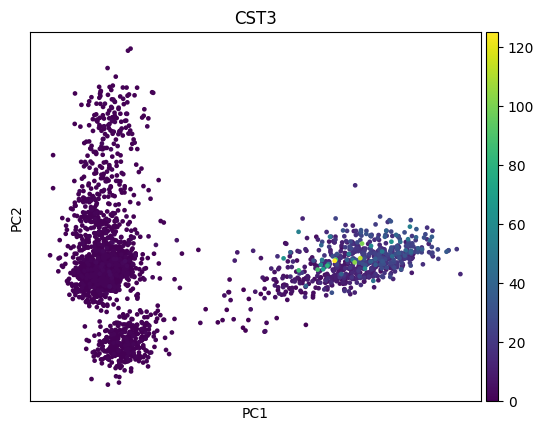

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


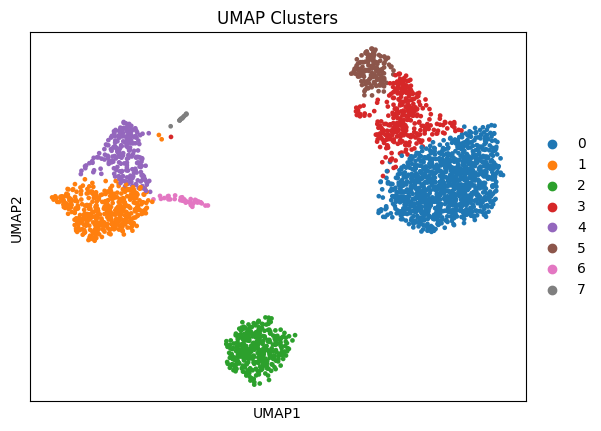

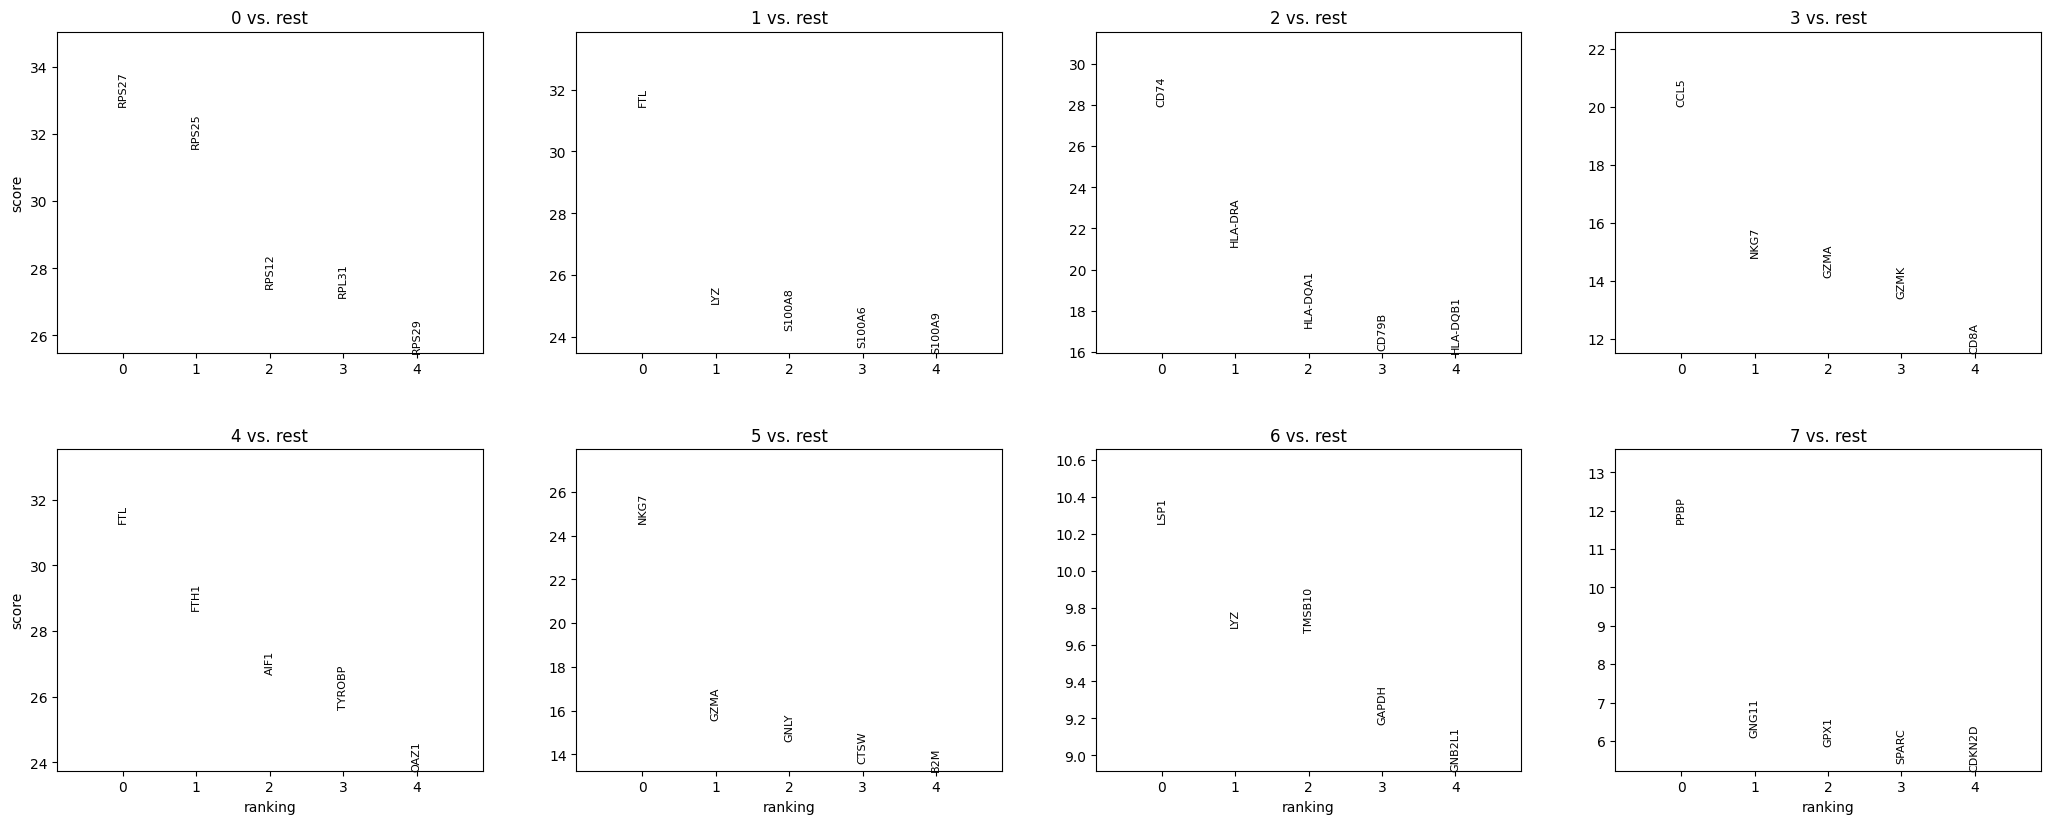

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:2074: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if group not in [*adata.obs_keys(), adata.obs.index.name]:
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_dendrogram.py:123: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if group not in adata.obs_keys():


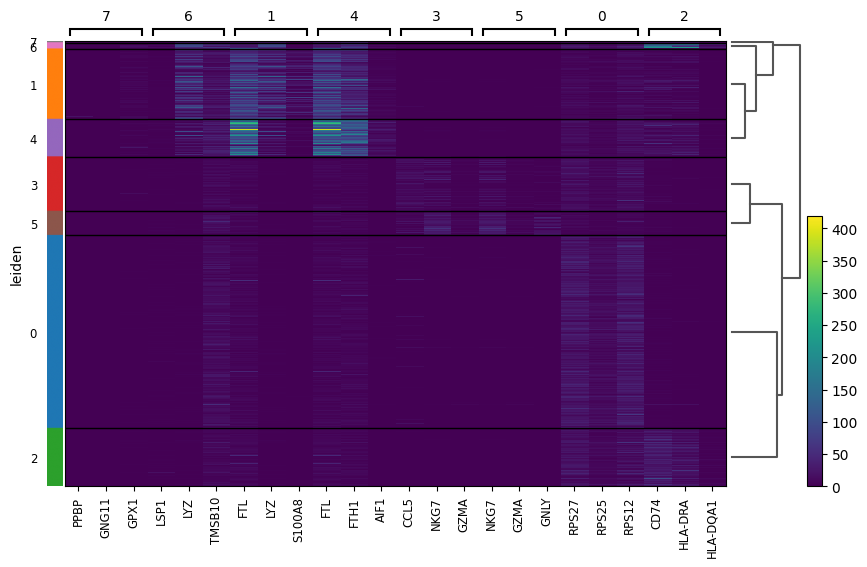

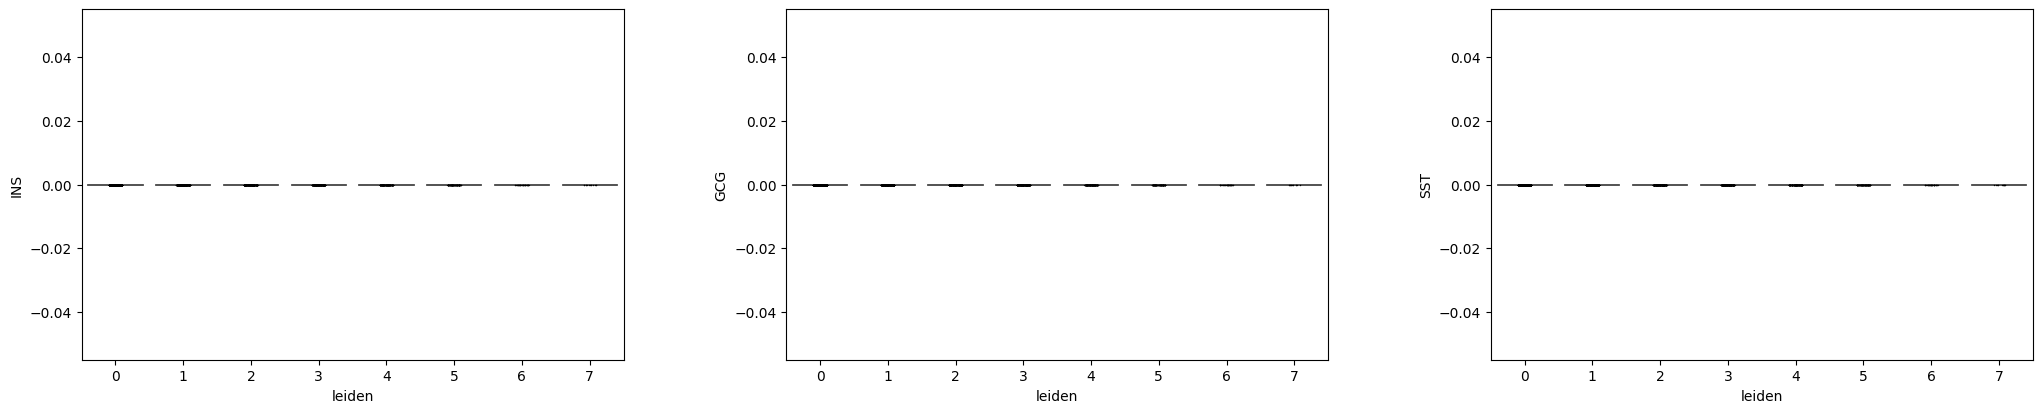

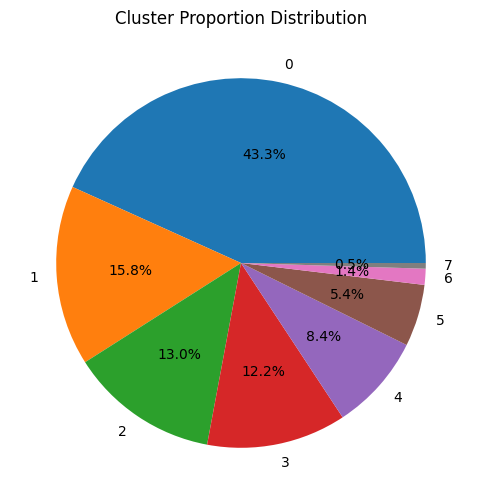

KeyError: "Values [np.str_('INS'), np.str_('GCG'), np.str_('SST'), np.str_('KRT19'), np.str_('PRSS1')], from [np.str_('INS'), np.str_('GCG'), np.str_('SST'), np.str_('KRT19'), np.str_('PRSS1')], are not valid obs/ var names or indices."

In [19]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Loading the synthetic data
adata = sc.datasets.pbmc3k()  # Loading pbmc3k as an alternative for demonstration
adata.var_names_make_unique()

print("Initial dataset shape:", adata.shape)
adata.raw = adata

# basic QC stats
sc.pl.highest_expr_genes(adata, n_top=20)


# Basic Preprocessing

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

# Normalize and Log Transform

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

adata = adata[:, adata.var.highly_variable]

# Dimensionality Reduction
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca(adata, color='CST3')

# Clustering

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

sc.pl.umap(adata, color=['leiden'], title='UMAP Clusters')

# Identify Cluster-Specific Genes

sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)

sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, show_gene_labels=True, figsize=(10,6))

selected_genes = ['INS', 'GCG', 'SST']
sc.pl.violin(adata, selected_genes, groupby='leiden', multi_panel=True)


cluster_counts = adata.obs['leiden'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title("Cluster Proportion Distribution")
plt.show()

marker_expr = adata[:, pancreas_markers].X.toarray()
df_expr = pd.DataFrame(marker_expr, columns=pancreas_markers)
corr = df_expr.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Marker Gene Expression Correlation")
plt.show()

print("\nSummary:")
print("Number of cells:", adata.n_obs)
print("Number of genes:", adata.n_vars)
print("Clusters identified:", adata.obs['leiden'].nunique())

In [11]:
pip install scanpy anndata seaborn matplotlib pandas numpy


Data shape: (3172, 15642)
AnnData object with n_obs × n_vars = 15642 × 3172


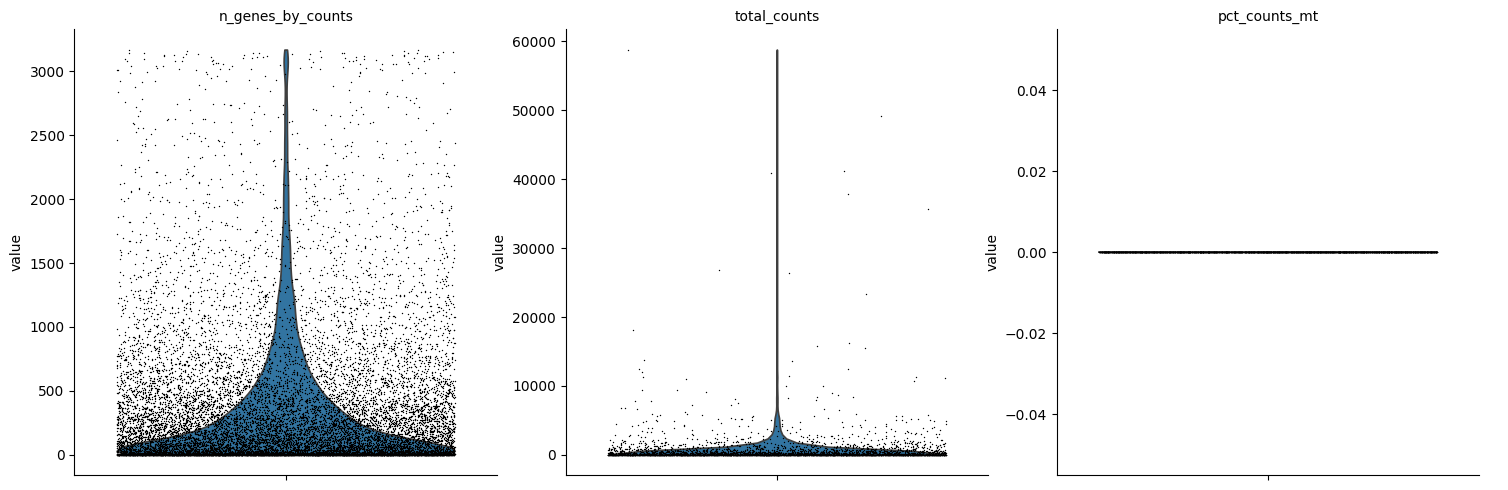

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


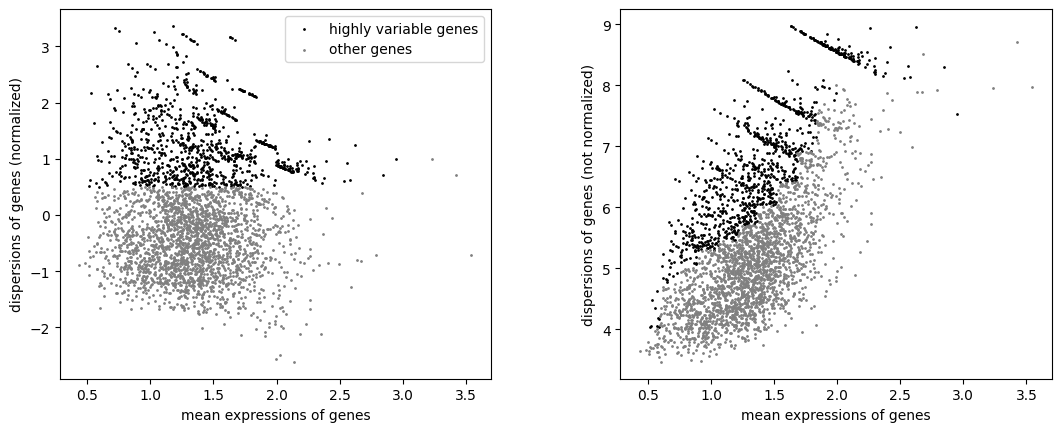

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_pca/__init__.py:245: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")


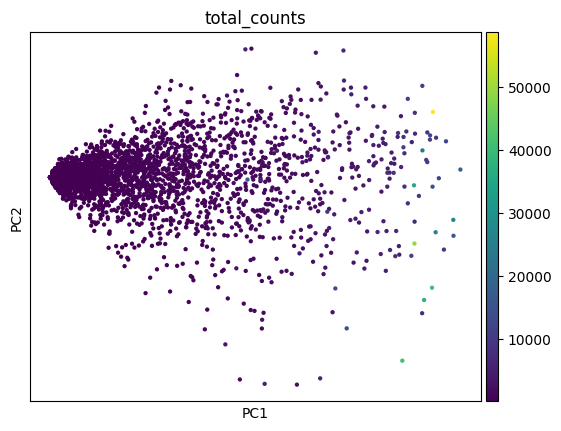

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():
/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


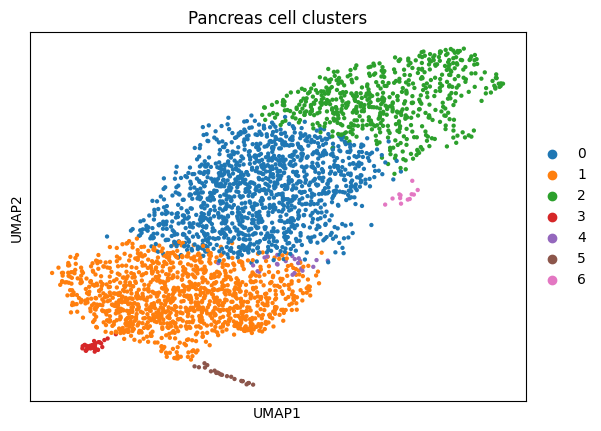

Found marker genes: []


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:482: 

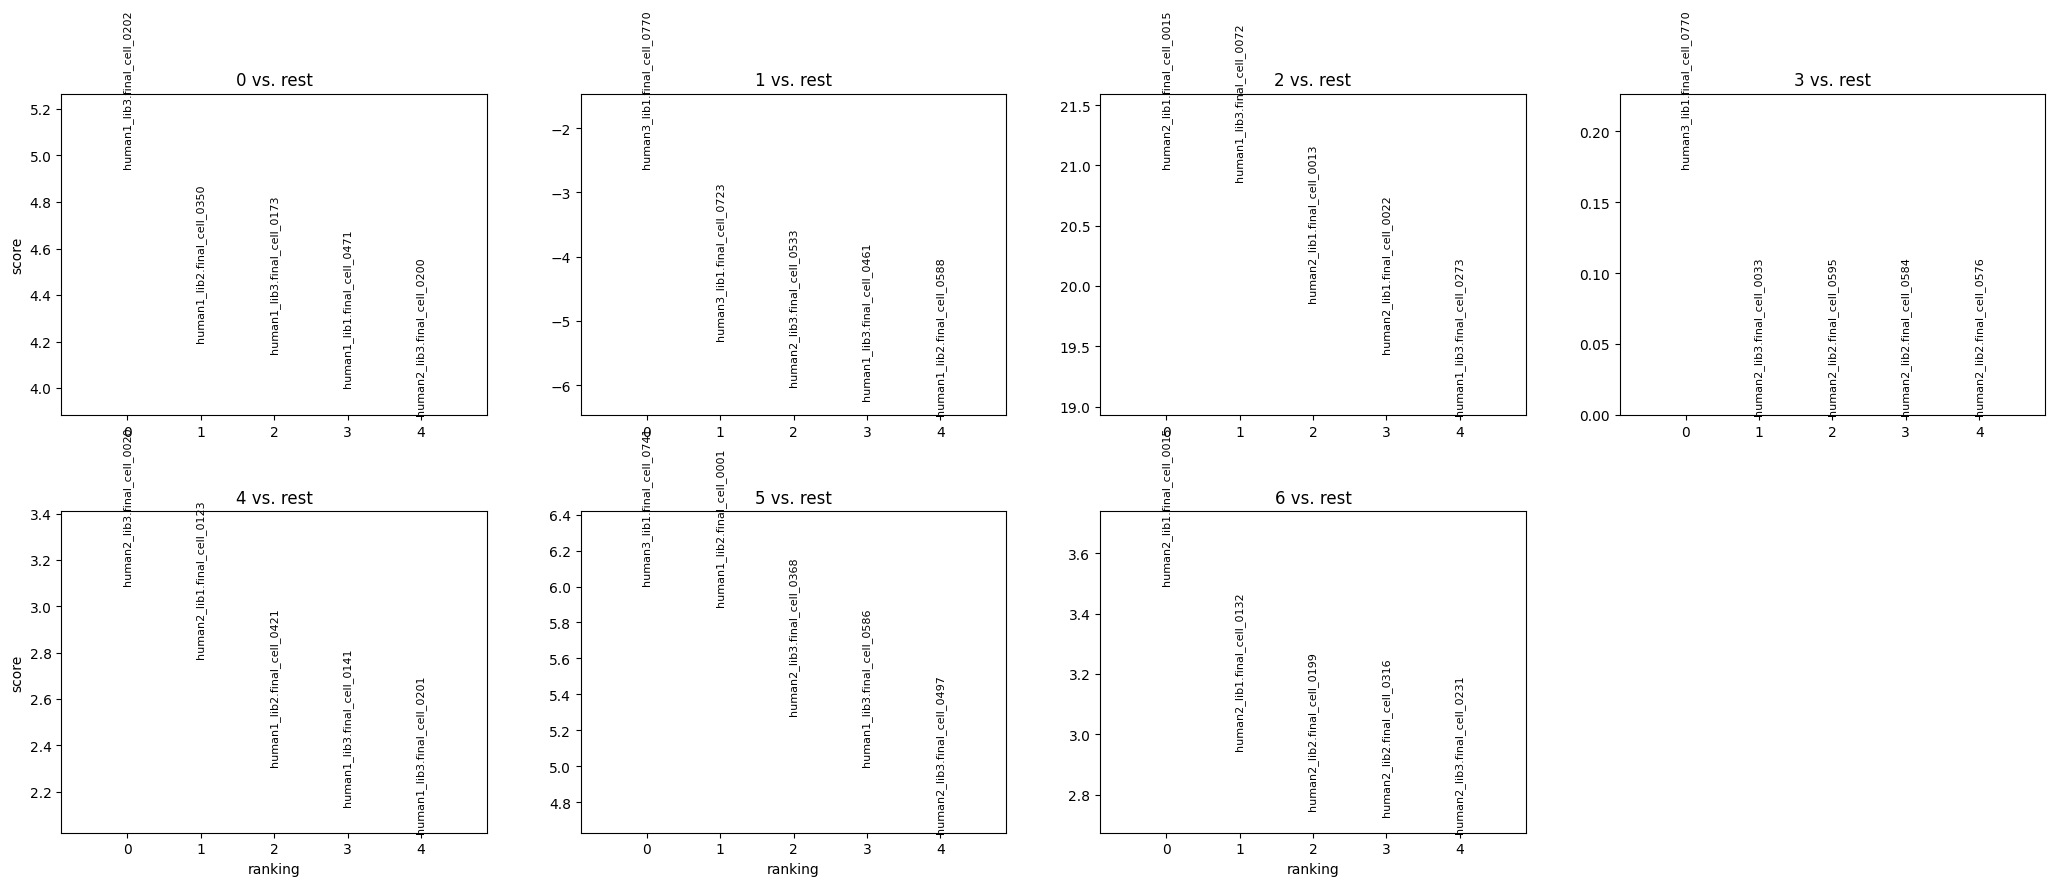

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_anndata.py:2074: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if group not in [*adata.obs_keys(), adata.obs.index.name]:
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_dendrogram.py:123: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  if group not in adata.obs_keys():


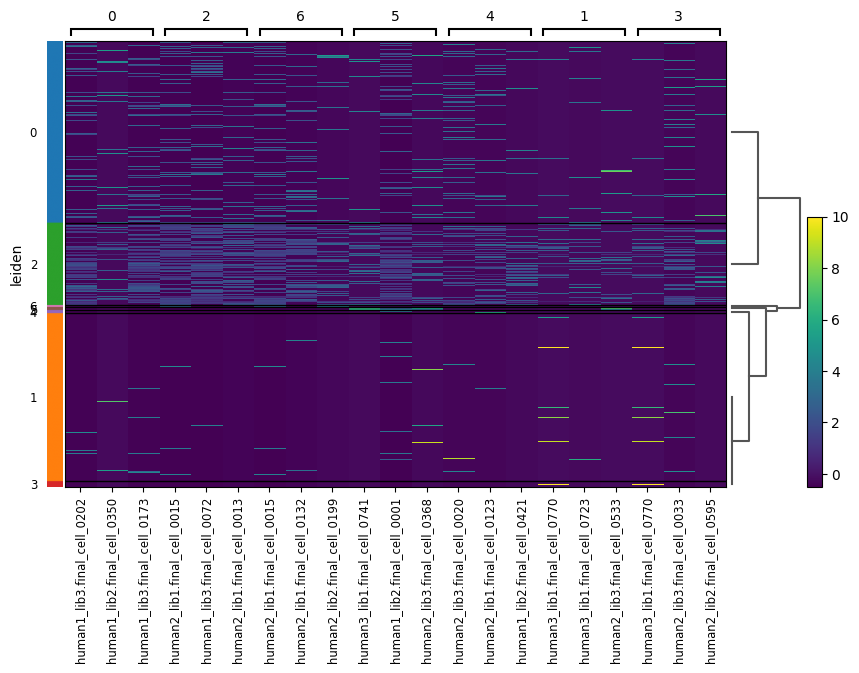

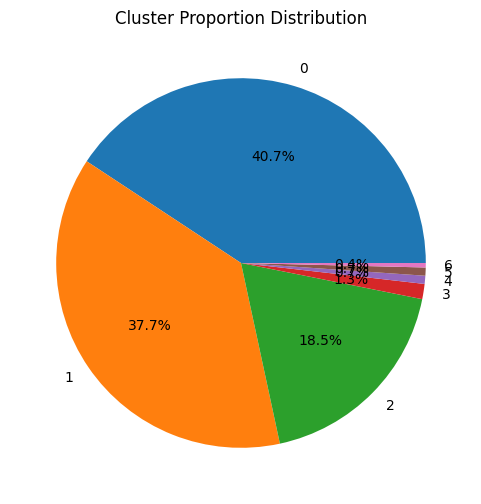

/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


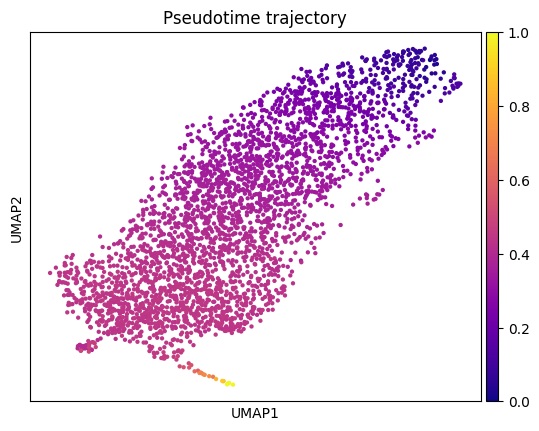


Summary:
Number of cells: 3094
Number of genes: 925
Clusters identified: 7


In [18]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


path = "/content/Combined_HumanPancreas_data.csv"

data = pd.read_csv(path, index_col=0)
print("Data shape:", data.shape)

adata = sc.AnnData(data.T)  # transpose: genes as vars, cells as obs
adata.var_names_make_unique()
print(adata)

adata.var['mt'] = adata.var_names.str.startswith(('MT-', 'mt-'))
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# Filter bad-quality cells
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]


sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

adata = adata[:, adata.var.highly_variable]


sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')


sc.pl.pca(adata, color='total_counts')

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

sc.pl.umap(adata, color=['leiden'], title='Pancreas cell clusters')

markers = ['INS', 'GCG', 'SST', 'KRT19', 'PRSS1', 'PPY']
found = [g for g in markers if g in adata.var_names]
print("Found marker genes:", found)

if found:
    sc.pl.umap(adata, color=found, cmap='viridis', title='Expression of key pancreatic genes')

sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=5, sharey=False)


sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, show_gene_labels=True, figsize=(10,6))


sel = [g for g in ['INS', 'GCG', 'SST', 'KRT19'] if g in adata.var_names]
if sel:
    sc.pl.violin(adata, sel, groupby='leiden', multi_panel=True)

import matplotlib.pyplot as plt

cluster_counts = adata.obs['leiden'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')
plt.title("Cluster Proportion Distribution")
plt.show()


if len(found) >= 2:
    expr = adata[:, found].X.toarray()
    df_expr = pd.DataFrame(expr, columns=found)
    corr = df_expr.corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Marker Gene Correlation")
    plt.show()

adata.uns['iroot'] = adata.obs['total_counts'].argmax()

sc.tl.dpt(adata)
sc.pl.umap(adata, color=['dpt_pseudotime'], cmap='plasma', title='Pseudotime trajectory')

print("\nSummary:")
print("Number of cells:", adata.n_obs)
print("Number of genes:", adata.n_vars)
print("Clusters identified:", adata.obs['leiden'].nunique())

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.89      1.00      0.94       131
           2       1.00      0.98      0.99       104
           3       0.95      0.94      0.94        82
           4       1.00      0.83      0.90        69
           5       0.96      0.98      0.97        44
           6       1.00      0.38      0.55         8
           7       1.00      1.00      1.00         5

    accuracy                           0.97       792
   macro avg       0.97      0.89      0.91       792
weighted avg       0.97      0.97      0.96       792



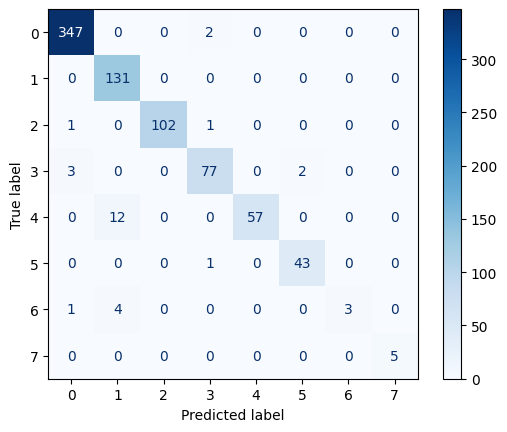

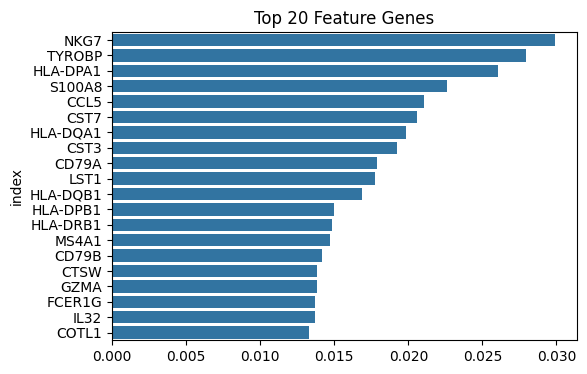

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns, matplotlib.pyplot as plt
import pandas as pd

# Use previous adata with clusters as labels
X = adata.X
y = adata.obs['leiden']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

# Feature importance
imp = pd.Series(rf.feature_importances_, index=adata.var_names)
top_imp = imp.sort_values(ascending=False).head(20)
plt.figure(figsize=(6,4))
sns.barplot(x=top_imp.values, y=top_imp.index)
plt.title('Top 20 Feature Genes')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = adata.X
y = adata.obs['leiden']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       332
           1       0.89      1.00      0.94       134
           2       1.00      1.00      1.00        93
           3       0.96      0.92      0.94       105
           4       1.00      0.81      0.89        67
           5       0.96      0.96      0.96        50
           6       1.00      0.44      0.62         9
           7       1.00      0.50      0.67         2

    accuracy                           0.96       792
   macro avg       0.97      0.83      0.88       792
weighted avg       0.96      0.96      0.96       792



/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():


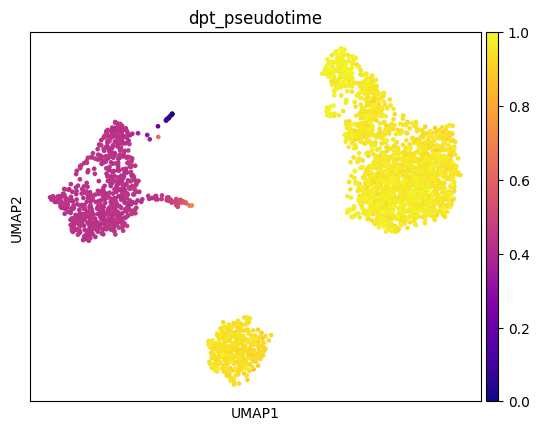

In [24]:

adata.uns['iroot'] = adata.obs['total_counts'].argmax()

sc.tl.dpt(adata, n_dcs=10)
sc.pl.umap(adata, color='dpt_pseudotime', cmap='plasma')

In [26]:
!pip install gseapy
import gseapy as gp

# Corrected way to access gene names for the first cluster (index 0)
genes = adata.uns['rank_genes_groups']['names'][0].tolist()[:100]

# Ensure genes is a list of strings
genes = [str(g) for g in genes]

enr = gp.enrichr(gene_list=genes, gene_sets='KEGG_2021_Human')
enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Viral protein interaction with cytokine and cy...,2/100,0.000511,0.012272,0,0,81.204082,615.404316,CCL5;PPBP
1,KEGG_2021_Human,Tuberculosis,2/180,0.001642,0.014922,0,0,44.528090,285.505023,CD74;LSP1
2,KEGG_2021_Human,Chemokine signaling pathway,2/192,0.001865,0.014922,0,0,41.690526,261.998918,CCL5;PPBP
3,KEGG_2021_Human,Cytokine-cytokine receptor interaction,2/295,0.004336,0.026015,0,0,26.894198,146.326558,CCL5;PPBP
4,KEGG_2021_Human,Herpes simplex virus 1 infection,2/498,0.011959,0.057056,0,0,15.723387,69.595495,CD74;CCL5


/tmp/ipython-input-69475384.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  centroids = adata.to_df().groupby(adata.obs['leiden']).mean()


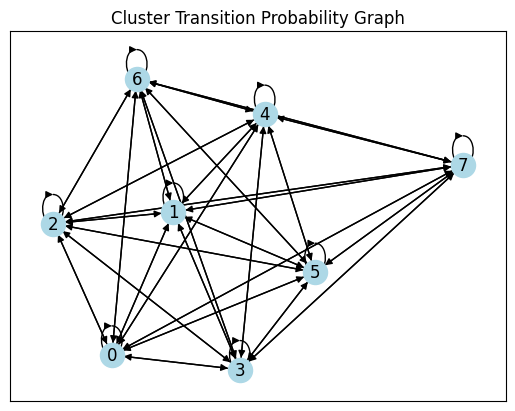

In [30]:
import numpy as np, networkx as nx, matplotlib.pyplot as plt

# Compute centroid distances between clusters
centroids = adata.to_df().groupby(adata.obs['leiden']).mean()
dist = np.linalg.norm(centroids.values[:,None]-centroids.values[None,:], axis=2)
transition_prob = np.exp(-dist/dist.std())
transition_prob /= transition_prob.sum(axis=1, keepdims=True)

G = nx.from_numpy_array(transition_prob, create_using=nx.DiGraph)
nx.draw_networkx(G, with_labels=True, node_color='lightblue', arrows=True)
plt.title("Cluster Transition Probability Graph")
plt.show()


In [33]:
drug_targets = ['INS', 'GCG', 'SST', 'PRSS1', 'PPY', 'KRT19']
found = [g for g in drug_targets if g in adata.var_names]
expr = adata[:, found].to_df()
cluster_means = expr.groupby(adata.obs['leiden']).mean()

display(cluster_means.style.background_gradient(cmap='viridis'))


/tmp/ipython-input-3825653541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = expr.groupby(adata.obs['leiden']).mean()


leiden
0
1
2
3
4
5
6
7


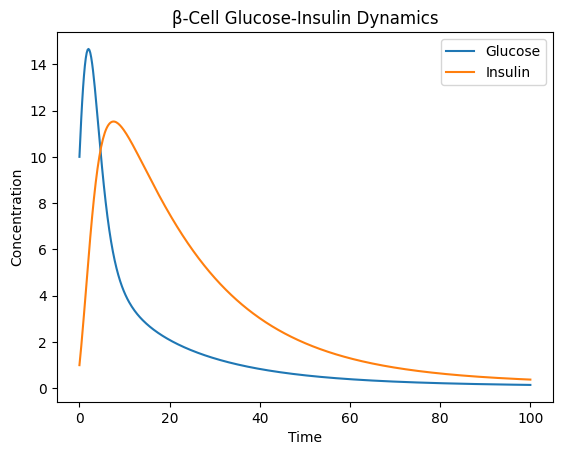

In [35]:
from scipy.integrate import odeint
import numpy as np, matplotlib.pyplot as plt

def beta_cell(y, t):
    G, I = y
    dG = -0.05*I*G + 5*np.exp(-0.1*t)       # glucose uptake
    dI = 0.2*G - 0.1*I                      # insulin response
    return [dG, dI]

t = np.linspace(0, 100, 500)
sol = odeint(beta_cell, [10, 1], t)
plt.plot(t, sol[:,0], label='Glucose')
plt.plot(t, sol[:,1], label='Insulin')
plt.legend(); plt.xlabel('Time'); plt.ylabel('Concentration'); plt.title('β-Cell Glucose-Insulin Dynamics')
plt.show()


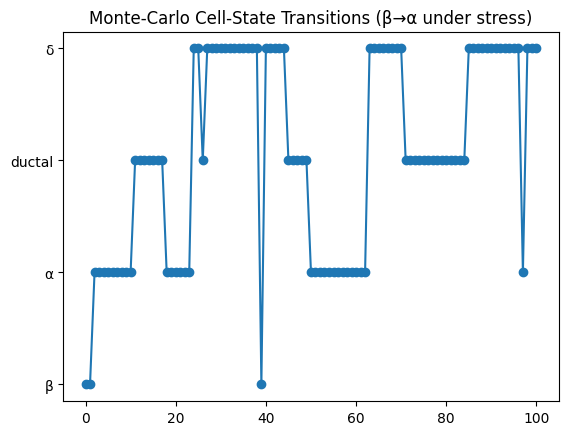

In [37]:
import random, matplotlib.pyplot as plt

states = ['β','α','δ','ductal']
P = np.array([[0.85,0.05,0.05,0.05],
              [0.1,0.8,0.05,0.05],
              [0.05,0.05,0.85,0.05],
              [0.05,0.05,0.05,0.85]])

trajectory = ['β']
for _ in range(100):
    trajectory.append(np.random.choice(states, p=P[states.index(trajectory[-1])]))
plt.plot(trajectory, marker='o')
plt.title("Monte-Carlo Cell-State Transitions (β→α under stress)")
plt.show()


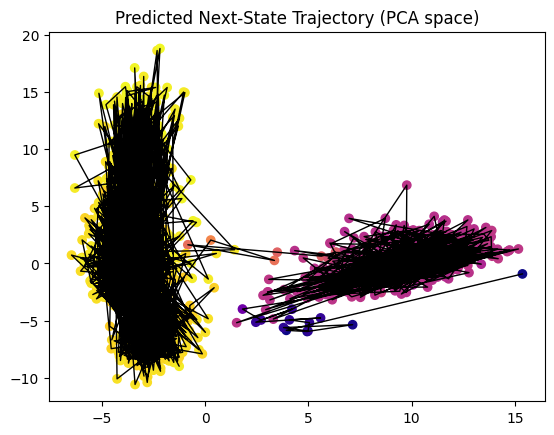

In [38]:
import numpy as np, matplotlib.pyplot as plt

pcs = adata.obsm['X_pca'][:,:2]
order = np.argsort(adata.obs['dpt_pseudotime'])
plt.scatter(pcs[:,0], pcs[:,1], c=adata.obs['dpt_pseudotime'], cmap='plasma')
plt.plot(pcs[order,0], pcs[order,1], color='black', lw=1)
plt.title("Predicted Next-State Trajectory (PCA space)")
plt.show()
